# A3-Q2: Golf Driving Range

In [2]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

In [3]:
# Supplied functions
def Ground(d):
    '''
     h = Ground(d)
     
     Returns the height (in metres) of the ground at a horizontal distance
     d (metres) from the origin.
    '''
    return 2.*(np.cos(d/4.)-np.sin(d/11.)-1)

def GroundSlope(d):
    '''
     h = GroundSlope(d)
     
     Returns the slope of the ground at a horizontal distance
     d (metres) from the origin.
    '''
    return 2.*(-1./4*np.sin(d/4) - 1./11*np.cos(d/11.))

## (a) MyOde

In [4]:
def MyOde(f, tspan, y0, h, event=(lambda t,y:1)):
    '''
     t,y = MyOde(f, tspan, y0, h, event=[])
    
     Numerically solves the initial value problem
    
        dy(t)/dt = f(t,y)
            y(0) = y0
    
     using the Modified Euler time-stepping method.
    
     Input
       f       a Python dynamics function with calling sequence
                  dydt = f(t, y)
       tspan   2-tuple giving the start and end times, [start, end]
       y0      initial state of the system (as a 1D vector)
       h       the time step to use (this is not adaptive time stepping)
       events  an event function with calling sequence
                  val = events(t, y)
               The computation stops as soon as a negative value is
               returned by the event function.
    
     Output
       t       1D vector holding time stamps
       y       an array that holds one state vector per row (corresponding
               to the time stamps)
    
       Notes:
           - t and y have the same number of rows.
    
           - The first element of t should be tspan[0], and the first
             row of y should be the initial state, y0.
    
           - If the computation was stopped by the triggering of an event,
             then the last row of t and y should correspond to the
             time that linear interpolation indicates for the zero-crossing
             of the event-function.
    '''
    
    # Initialize output arrays, tlst and ylst
    t = tspan[0]
    y = deepcopy(y0)
    
    tlst = []
    ylst = []
    notfirst = False;
    
    numBounces = 0;
    
    while (t < tspan[1] and numBounces < 3): 
        prevz = y;
        prevt = t;
        normalEulers = y + h*f(t,y);
        newTime = t+h;
    
        RumeEulers = y + (h/2) * (f(t,y) + f(newTime, normalEulers))

        if (notfirst and (event(newTime, RumeEulers) < 0)):
            
            zz = prevz
            tt = prevt;
            
            while (event(tt, zz) > 0):
                prevt = tt;
                prevz = zz;
                tt += h/40
                zz = zz + h/40 * f(tt, zz)
            
            
            velocity = np.array([RumeEulers[2], RumeEulers[3]])
            
            slope = GroundSlope(zz[0])
            normSlope = -1/GroundSlope(zz[0])
            
            length = np.sqrt(1+slope**2)
            normLength = np.sqrt(1+normSlope**2)
            
            rep = 1/length
            normrep = 1/normLength
            
            
            u = np.array([rep, slope*rep])
            U = np.array([normrep, normSlope*normrep ])
            
            new = 0.85*(np.dot(velocity,u) *u - np.dot(velocity, U) *U)
            

            
            new = np.array([prevz[0], prevz[1], new[0], new[1]])
            
   
            y = new
            t = prevt
        
            tlst.append(t)
            ylst.append(y)
            
            numBounces += 1;

            
            
        else:
            tlst.append(newTime)
            ylst.append(RumeEulers)
            
            y = RumeEulers;
            t = newTime;
            
        notfirst = True;
            
        
    
    
    return np.array(tlst), np.array(ylst)


## (b) Dynamics Function: `projectile`

In [5]:
def projectile(t, z):
    
    '''
    z[0] = x
    z[1] = y
    z[2] = x'
    z[3] = y'
    '''
    
    K = 0.3
    g = 9.81;
    
    return np.array([z[2], z[3], -K * z[2], -g -K* z[3]])

## (c) Events Function: `projectile_events`

In [6]:
def projectile_events(t, z):
    
    val = 1
    
    if (Ground(z[0]) > z[1]):
        val = -1;
    
    return val

## (d) Three flights

In [8]:
theta = 50
S = 58
tspan = [0, 30]
h = 0.05
theta_rad = theta/180.*np.pi
yStart = np.array([0, 0, S*np.cos(theta_rad), S*np.sin(theta_rad)])

t,y = MyOde(projectile, tspan, yStart, h, projectile_events)
print(y)

[[ 1.85010344e+00  2.19260492e+00  3.67266503e+01  4.32822962e+01]
 [ 3.67266346e+00  4.32822637e+00  3.61798823e+01  4.21511098e+01]
 [ 5.46809012e+00  6.40771269e+00  3.56412543e+01  4.10367639e+01]
 [ 7.23678737e+00  8.43189960e+00  3.51106452e+01  3.99390078e+01]
 [ 8.97915313e+00  1.04016104e+01  3.45879354e+01  3.88575946e+01]
 [ 1.06955794e+01  1.23176560e+01  3.40730075e+01  3.77922809e+01]
 [ 1.23864524e+01  1.41808354e+01  3.35657456e+01  3.67428271e+01]
 [ 1.40521526e+01  1.59919357e+01  3.30660356e+01  3.57089970e+01]
 [ 1.56930546e+01  1.77517322e+01  3.25737650e+01  3.46905580e+01]
 [ 1.73095277e+01  1.94609886e+01  3.20888231e+01  3.36872811e+01]
 [ 1.89019355e+01  2.11204575e+01  3.16111007e+01  3.26989405e+01]
 [ 2.04706364e+01  2.27308799e+01  3.11404904e+01  3.17253137e+01]
 [ 2.20159832e+01  2.42929861e+01  3.06768864e+01  3.07661819e+01]
 [ 2.35383237e+01  2.58074954e+01  3.02201843e+01  2.98213291e+01]
 [ 2.50380003e+01  2.72751163e+01  2.97702813e+01  2.88905428e

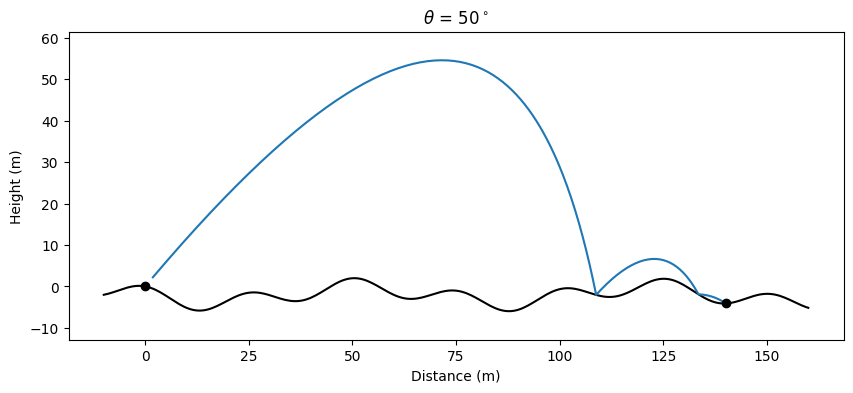

In [9]:
# Plot the ground
x = np.linspace(-10, 160, 300)
hills = Ground(x)
plt.figure(figsize=[10,4])
plt.plot(x,hills, 'k')
plt.axis('equal')

plt.plot(y[:,0], y[:,1])  # Plot ball trajectory
plt.plot([0],[0], 'ko')   # Plot initial ball position
plt.plot(y[-1,0], y[-1,1], 'ko')  # Plot final ball position

plt.title(r'$\theta$ = '+str(theta)+'$^\circ$');
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)');